In [1]:
import cveig
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import pandas as pd
from scipy import stats
import networkx as nx

In [3]:
adj_matrix_point = pd.read_table('../../masters_r/samples/graph_point_60_1.table', sep=' ').to_numpy()
adj_matrix_exp = pd.read_table('../../masters_r/samples/graph_exp_60_1.table', sep=' ').to_numpy()
adj_matrix_pareto = pd.read_table('../../masters_r/samples/graph_pareto_60_1.table', sep=' ').to_numpy()

In [4]:
G_point = nx.from_numpy_array(adj_matrix_point)
G_exp = nx.from_numpy_array(adj_matrix_exp)
G_pareto = nx.from_numpy_array(adj_matrix_pareto)

Text(0, 0.5, 'Frequency')

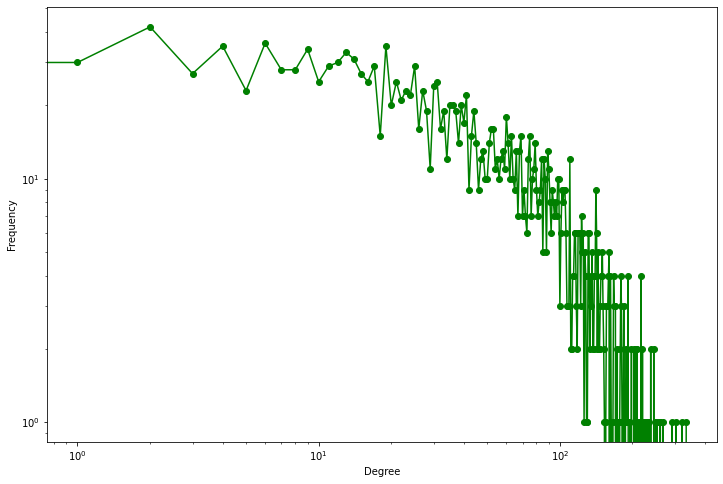

In [11]:
degree_freq = nx.degree_histogram(G_exp)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

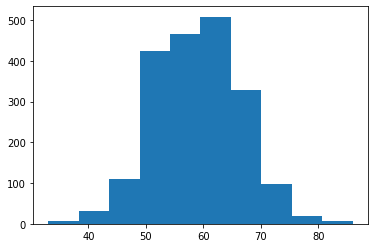

In [37]:
def plot_degree_dist1(G, log=False):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    if log:
        plt.yscale('log')
        plt.xscale('log')
    plt.show()

plot_degree_dist1(G_point)

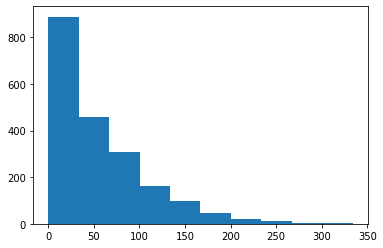

In [38]:
plot_degree_dist1(G_exp)

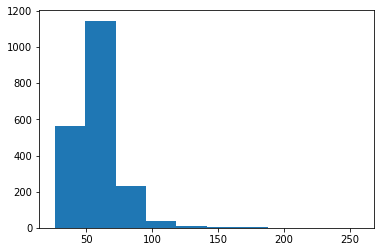

In [39]:
plot_degree_dist1(G_pareto)

In [42]:
def plot_degree_dist(G, log_scale=True, log_binning=True, num_bins=20, do_show=True):
    fig = plt.figure()
    fig.suptitle('Degree distribution')
    ax = fig.add_subplot()
    if log_scale:
        ax.set_yscale('log')
        ax.set_xscale('log')
    degrees = [G.degree(n) for n in G.nodes()]
    if log_binning:
        if min(degrees) == 0:
            start = 0
        else:
            start = np.log10(min(degrees))
        bins = np.logspace(start=start, stop=np.log10(max(degrees)), num=num_bins)
    else:
        bins = np.linspace(start=min(degrees), stop=max(degrees), num=num_bins)
    n, bins, patches = plt.hist(degrees, bins)
    if do_show:
        plt.show()
        plt.suptitle('Degree distribution')
    return n, bins

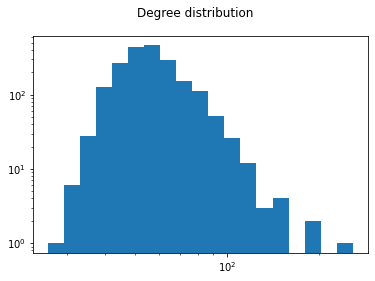

(array([  1.,   6.,  28., 129., 265., 446., 463., 296., 153., 114.,  51.,
         26.,  12.,   3.,   4.,   0.,   2.,   0.,   1.]),
 array([ 26.        ,  29.33186327,  33.09070012,  37.3312266 ,
         42.11517056,  47.51217018,  53.60078767,  60.4696529 ,
         68.2187535 ,  76.96089041,  86.8233198 ,  97.9496056 ,
        110.5017092 , 124.66234714, 140.63765084, 158.66016714,
        178.99224345, 201.92984662, 227.80687123, 257.        ]))

<Figure size 432x288 with 0 Axes>

In [43]:
plot_degree_dist(G_pareto)

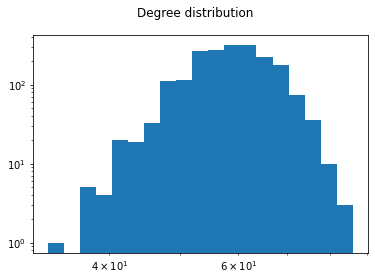

(array([  1.,   0.,   5.,   4.,  20.,  19.,  33., 112., 114., 266., 270.,
        314., 316., 225., 177.,  74.,  36.,  10.,   3.]),
 array([33.        , 34.70626364, 36.50074958, 38.38801933, 40.37287029,
        42.46034789, 44.65575843, 46.96468258, 49.39298956, 51.94685206,
        54.6327619 , 57.45754661, 60.42838669, 63.55283394, 66.83883061,
        70.29472959, 73.92931569, 77.75182792, 81.77198298, 86.        ]))

<Figure size 432x288 with 0 Axes>

In [44]:
plot_degree_dist(G_point)

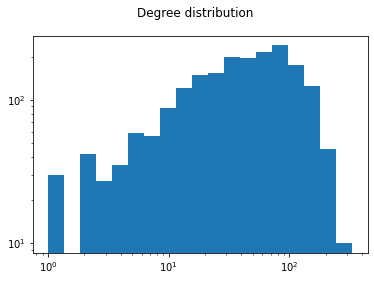

(array([ 30.,   0.,  42.,  27.,  35.,  59.,  56.,  88., 121., 149., 153.,
        200., 196., 216., 239., 175., 125.,  45.,  10.]),
 array([  1.        ,   1.35777798,   1.84356105,   2.50314659,
          3.39871733,   4.61470355,   6.26574287,   8.5074877 ,
         11.55127947,  15.68407292,  21.29548886,  28.91454586,
         39.25953369,  53.30573038,  72.37734697,  98.27236802,
        133.43205742, 181.17110951, 245.99014325, 334.        ]))

<Figure size 432x288 with 0 Axes>

In [45]:
plot_degree_dist(G_exp)